In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib import rc,ticker
from matplotlib.tri import Triangulation
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema,find_peaks
from scipy.signal import convolve2d as conv2
from vertexmodelpack import readTissueFiles as rTF

In [3]:
import importlib

In [4]:
importlib.reload(rTF)

<module 'vertexmodelpack.readTissueFiles' from '/home/rafael/Documents/tissuemodelling/SpringNetworkSimul/PythonFilesAlreadySet/vertexmodelpack/readTissueFiles.py'>

In [24]:
# font = font_manager.FontProperties(family='serif', size=12, math_fontfamily='cm')
# font1 = {'family' : 'serif',
#         'size'   : 15,'serif':'cmr10','style':'italic'}
# rc('font', **font1)

# Opening files

In [5]:
a0_sizes = [0.886]
aw_sizes = [0.886]
dt_list = 5e-3
Tsim = 200
wound_sizes = ['0.886']
wound_sizes1 = ['10.304']
tissues_list = [1]
tissues_list1 = [10]
LW1_list =  [0.,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3]
L1_list = [3.21, 3.24,3.27,3.3,3.33,3.36,3.39,3.42,3.45,3.48,3.51,3.54,3.57,3.6,3.63,3.66,3.69,3.72,3.75,3.78]


# L2_list =  [0,3.5,4.]
# LW2_list = [0,1.5,2.0,3.5]

LW2_list =  [0.,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3]
L2_list = [3.21, 3.24,3.27,3.3,3.33,3.36,3.39,3.42,3.45,3.48,3.51,3.54,3.57,3.6,3.63,3.66,3.69,3.72,3.75,3.78]


dt_list1 = 5e-3
Tsim1 = 200
Nc = 225
Nc1 = 216
foldername = 'tissues/tissue1/size'

LW1_list

In [6]:

a1_array1, p1_array1,t_array1, t1_array1, opt_array1 = rTF.openTissueSimpleFile(Tsim, wound_sizes,tissues_list,1,LW1_list,L1_list,Nc,foldername)
a1_array2, p1_array2,t_array2, t1_array2, opt_array2 = rTF.openTissueSimpleFile(Tsim1, wound_sizes1,tissues_list1,1.0,LW2_list,L2_list,Nc1,foldername)


array([ 5, 11,  2,  1,  3,  7,  8, 10,  6,  4,  9])

In [7]:
p1_array2.shape

(1, 20, 11, 200)

In [8]:
1/np.mean(a0_sizes)**1

1.1286681715575622

# Do necessary rescalings

In [9]:
beta1_lin = np.array(L1_list)/(float(aw_sizes[0]**(0)))
lambda1_lin = np.array(LW1_list)

beta2_lin = np.array(L2_list)/(float(aw_sizes[0]**(0)))
lambda2_lin = np.array(LW2_list)

# Differential behavioral outcomes classification

In [10]:
# D_array = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

def GradArray(Array):
    D_array = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    return np.sqrt(conv2(Array,D_array,'same','symm')**2 + conv2(Array,D_array.T,'same','symm')**2)/3 #1/2 for using the center derivative and 1/3 because for some reason it multiplies it by 3 (maybe the convolution adds up the number of terms for each row)
# plt.clim(0,8)

In [11]:
avg_p1 = np.zeros((len(L1_list),len(LW1_list),Tsim))
p_norm = 0*a1_array1
std_p1 = np.zeros((len(L1_list),len(LW1_list),Tsim)); avg_t = 0*t_array1[0]
w_list = [float(w) for w in wound_sizes]
for i in range(len(L1_list)):
    for j in range(len(LW1_list)):
        avg_t[i,j] = int(np.mean(t_array1[:,i,j]/(w_list[:len(tissues_list)])))

        for l in range(len(tissues_list)):
            p_norm[l,i,j] = a1_array1[l,i,j]/a1_array1[l,i,j,0]
        avg_p1[i,j] = np.mean(p_norm[:,i,j],0); std_p1[i,j] = np.std(p_norm[:,i,j],0)

In [12]:
avg_p2 = np.zeros((len(L2_list),len(LW2_list),Tsim1))
p_norm = 0*a1_array2
std_p1 = np.zeros((len(L2_list),len(LW2_list),Tsim1)); avg_t2 = 0*t_array2[0]
w_list = [float(w) for w in wound_sizes]
for i in range(len(L2_list)):
    for j in range(len(LW2_list)):
        avg_t2[i,j] = int(np.mean(t_array2[:,i,j]/(w_list[:len(tissues_list)])))

        for l in range(len(tissues_list)):
            p_norm[l,i,j] = a1_array2[l,i,j]/a1_array2[l,i,j,0]
        avg_p2[i,j] = np.mean(p_norm[:,i,j],0); std_p1[i,j] = np.std(p_norm[:,i,j],0)

In [13]:
diff_a1 = np.diff(a1_array1,1)
diff_a2 = np.diff(a1_array2,1)

In [14]:
diff_a2.shape

(1, 20, 11, 199)

In [188]:
abin = np.zeros((a1_array1.shape[0],a1_array1.shape[1],a1_array1.shape[2]))
bbin = np.zeros((a1_array1.shape[0],a1_array1.shape[1],a1_array1.shape[2]))
cbin = np.zeros((opt_array1.shape[0],opt_array1.shape[1],opt_array1.shape[2]))
for i in range(len(tissues_list)):
    abin[i,:,:] = (a1_array1[i,:,:,-1]>=aw_sizes[i])
    bbin[i,:,:] = (a1_array1[i,:,:,-1]<aw_sizes[i])*(a1_array1[i,:,:,-1]>0.9*aw_sizes[i])
    cbin[i,:,:] = (opt_array1[i,:,:]<=0.85)*(opt_array1[i,:,:]>=dt_list)
    
dbin = np.zeros((a1_array1.shape[0],a1_array1.shape[1],a1_array1.shape[2]))

list_lw = []
list_p0 = []
long_lw = []
long_p0 = []
for i in range(len(tissues_list)):
    dbin[i] = GradArray(abin[i])>0.2
    loc1, loc2 = np.where(dbin[i]>0)
    lp0 = list(beta1_lin[loc1])
    llw = list(lambda1_lin[loc2])
    list_p0.append(beta1_lin[loc1])
    list_lw.append(lambda1_lin[loc2])
    for p0 in lp0:
        long_p0.append(p0)
    for lw in llw:
        long_lw.append(lw)
 
 

longa_lw = []
longa_p0 = []
for i in range(len(tissues_list)):
    loc1, loc2 = np.where(abin[i]==1)
    lp0 = list(beta1_lin[loc1])
    llw = list(lambda1_lin[loc2])
    for p0 in lp0:
        longa_p0.append(p0)
    for lw in llw:
        longa_lw.append(lw)
        
longf_lw = []
longf_p0 = []
for i in range(len(tissues_list)):
    loc1, loc2 = np.where(abin[i]==0)
    lp0 = list(beta1_lin[loc1])
    llw = list(lambda1_lin[loc2])
    for p0 in lp0:
        longf_p0.append(p0)
    for lw in llw:
        longf_lw.append(lw)
            

list2_lw = []
list2_p0 = []
long2_lw = []
long2_p0 = []
for i in range(len(tissues_list)):
    loc1, loc2 = np.where(bbin[i]>0)
    lp0 = list(beta1_lin[loc1])
    llw = list(lambda1_lin[loc2])
    list2_p0.append(beta1_lin[loc1])
    list2_lw.append(lambda1_lin[loc2])
    for p0 in lp0:
        long2_p0.append(p0)
    for lw in llw:
        long2_lw.append(lw)
    
list3_lw = []
list3_p0 = []
long3_lw = []
long3_p0 = []
for i in range(len(tissues_list)):
    loc1, loc2 = np.where(cbin[i]>0)
    lp0 = list(beta1_lin[loc1])
    llw = list(lambda1_lin[loc2])
    list3_p0.append(beta1_lin[loc1])
    list3_lw.append(lambda1_lin[loc2])
    for p0 in lp0:
        long3_p0.append(p0)
    for lw in llw:
        long3_lw.append(lw)

In [162]:
abin1 = np.zeros((a1_array2.shape[0],a1_array2.shape[1],a1_array2.shape[2]))
bbin1 = np.zeros((a1_array2.shape[0],a1_array2.shape[1],a1_array2.shape[2]))
cbin1 = np.zeros((opt_array2.shape[0],opt_array2.shape[1],opt_array2.shape[2]))
for i in range(len(tissues_list)):
    abin1[i,:,:] = (a1_array2[i,:,:,-1]>=10.304)
    bbin1[i,:,:] = (a1_array2[i,:,:,-1]<10.304)*(a1_array2[i,:,:,-1]>0.9*10.304)
    cbin1[i,:,:] = (opt_array2[i,:,:]<=0.85)*(opt_array2[i,:,:]>=dt_list)
    
dbin1 = np.zeros((a1_array2.shape[0],a1_array2.shape[1],a1_array2.shape[2]))

list_lw1 = []
list_p01 = []
long_lw1 = []
long_p01 = []
for i in range(len(tissues_list)):
    dbin1[i] = GradArray(abin1[i])>0.2
    loc1, loc2 = np.where(dbin1[i]>0)
    lp0 = list(beta2_lin[loc1])
    llw = list(lambda2_lin[loc2])
    list_p01.append(beta2_lin[loc1])
    list_lw1.append(lambda2_lin[loc2])
    for p0 in lp0:
        long_p01.append(p0)
    for lw in llw:
        long_lw1.append(lw)
 
 

longa_lw1 = []
longa_p01 = []
for i in range(len(tissues_list)):
    loc1, loc2 = np.where(abin1[i]==1)
    lp0 = list(beta2_lin[loc1])
    llw = list(lambda2_lin[loc2])
    for p0 in lp0:
        longa_p01.append(p0)
    for lw in llw:
        longa_lw1.append(lw)
        
longf_lw1 = []
longf_p01 = []
for i in range(len(tissues_list)):
    loc1, loc2 = np.where(abin1[i]==0)
    lp0 = list(beta2_lin[loc1])
    llw = list(lambda2_lin[loc2])
    for p0 in lp0:
        longf_p01.append(p0)
    for lw in llw:
        longf_lw1.append(lw)
            

list2_lw1 = []
list2_p01 = []
long2_lw1 = []
long2_p01 = []
list2_diffa1 = []
for i in range(len(tissues_list)):
    loc1, loc2 = np.where(bbin1[i]>0)
    lp0 = list(beta2_lin[loc1])
    llw = list(lambda2_lin[loc2])
    list2_p01.append(beta2_lin[loc1])
    list2_lw1.append(lambda2_lin[loc2])
    list2_diffa1.append(diff_a2[0,loc1,loc2,-1])
    for p0 in lp0:
        long2_p01.append(p0)
    for lw in llw:
        long2_lw1.append(lw)
    
list3_lw1 = []
list3_p01 = []
long3_lw1 = []
long3_p01 = []
for i in range(len(tissues_list)):
    loc1, loc2 = np.where(cbin1[i]>0)
    lp0 = list(beta2_lin[loc1])
    llw = list(lambda2_lin[loc2])
    list3_p01.append(beta2_lin[loc1])
    list3_lw1.append(lambda2_lin[loc2])
    for p0 in lp0:
        long3_p01.append(p0)
    for lw in llw:
        long3_lw1.append(lw)

In [45]:
array_lw = np.zeros((len(tissues_list),9))
array_p0 = np.zeros((len(tissues_list),9))

for i in range(len(tissues_list)-1):
    print(i)
    array_lw[i] = list_lw[i][:]
    array_p0[i] = list_p0[i][:]

# Visualization 1

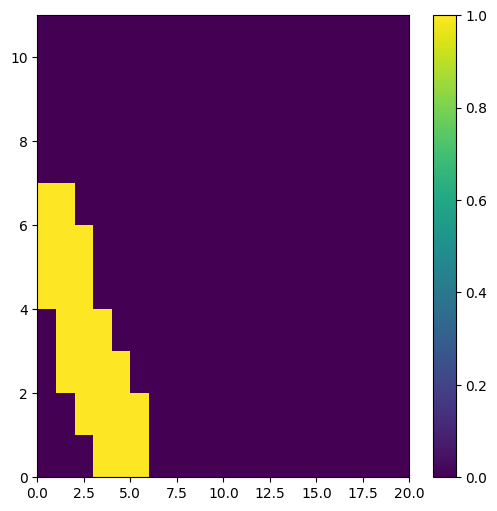

In [189]:
plt.figure(figsize=(6,6))

plt.pcolormesh(np.mean(dbin,0).T)
plt.colorbar()


# Visualizing final perimeter for different parameters

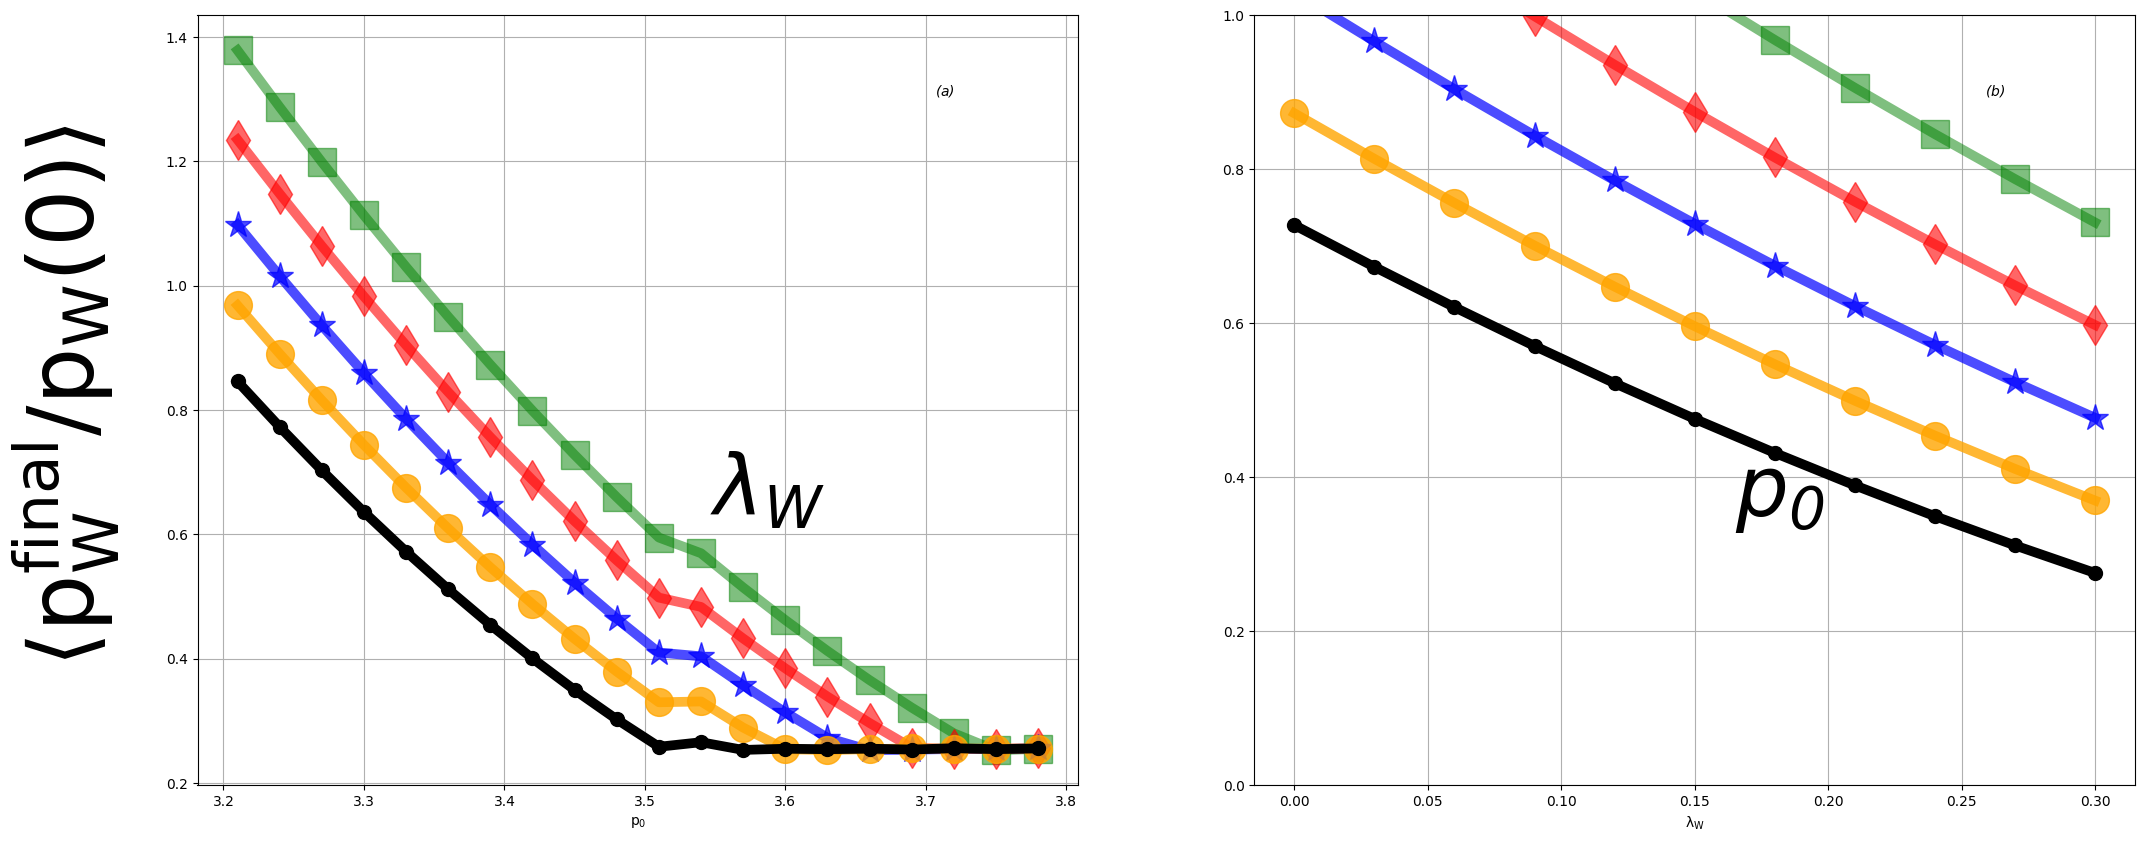

In [190]:

fig,ax = plt.subplots(1,2,figsize=(25,10))


fig.supylabel("$\langle\mathregular{p_W^{final}/p_W(0)}\\rangle$",x=0.05,fontsize=65)

Tf = -1

# ax[0].annotate('',xy=(0.5,0.5),xytext=(4.5,1.25),arrowprops={"width":10,"headwidth":30,'headlength':30,'color':'k'})
# ax[1].annotate('',xy=(0.5,0.5),xytext=(11.75,1.25),arrowprops={"width":10,"headwidth":30,'headlength':30,'color':'k'})

ax[0].plot(beta1_lin[:],(avg_p1[:,0,Tf]),'gs-',alpha=0.5, ms = 20,label=lambda1_lin[0].round(2),mfc = 'g',lw=7)
ax[0].plot(beta1_lin[:],(avg_p1[:,2,Tf]),'rd-',alpha=0.6, ms = 20,label=lambda1_lin[2].round(2),mfc = 'r',lw=7)
ax[0].plot(beta1_lin[:],(avg_p1[:,4,Tf]),'b*-',alpha=0.7, ms = 20,label=lambda1_lin[4].round(2),mfc = 'b',lw=7)
ax[0].plot(beta1_lin[:],(avg_p1[:,6,Tf]),'o-',color='orange',alpha=0.8, ms = 20,label=lambda1_lin[6].round(2),mfc = 'orange',lw=7)
ax[0].plot(beta1_lin[:],(avg_p1[:,8,Tf]),'k.-',alpha=1, ms = 20,label=lambda1_lin[8].round(2),lw=7)
ax[0].set_xlabel("$\mathregular{p_0}$")
# ax[0].arrow(1,0,1.57,-0.0005)
# ax[0].set_xticks([0,2,4,6])
# ax[0].set_yticks([1,2,3]) 
ax[0].grid(which = 'both')
# ax[0].set_ylim([0,3])
# plt.legend(prop=font,loc = "best")




ax[1].plot(lambda1_lin,(avg_p1[0,:,Tf]),'gs-',alpha=0.5, ms = 20,label=beta1_lin[0].round(2),mfc = 'g',lw=7)
ax[1].plot(lambda1_lin,(avg_p1[2,:,Tf]),'rd-',alpha=0.6, ms = 20,label=beta1_lin[2].round(2),mfc = 'r',lw=7)
ax[1].plot(lambda1_lin,(avg_p1[4,:,Tf]),'b*-',alpha=0.7, ms = 20,label=beta1_lin[4].round(2),mfc = 'b',lw=7)
ax[1].plot(lambda1_lin,(avg_p1[6,:,Tf]),'o-',color='orange',alpha=0.8, ms = 20,label=beta1_lin[6].round(2),mfc = 'orange',lw=7)
ax[1].plot(lambda1_lin,(avg_p1[8,:,Tf]),'k.-',alpha=1, ms = 20,label=beta1_lin[8].round(2),lw=7)
ax[1].set_xlabel("$\mathregular{\lambda_W}$")
ax[1].grid(which = 'both')
# ax[1].set_xticks([0,5,10,15,20])
# ax[1].set_yticks([1,2,3]) 
ax[1].set_ylim([0,1])
# plt.legend(prop=font,loc = "best")
plt.figtext(0.33,0.38,"$\mathregular{\lambda_W}$", fontsize = 60,fontstyle = "italic",color = "black")
plt.figtext(0.74,0.38,"$\mathregular{p_0}$",fontstyle = "italic", fontsize = 60,color = "black")
plt.figtext(0.84,0.8,"$\mathregular{(b)}$",fontstyle = "italic",color = "black")
plt.figtext(0.42,0.8,"$\mathregular{(a)}$",fontstyle = "italic",color = "black")

# fig.legend(lines, labels, prop=font, loc='lower center', ncols=3, bbox_to_anchor = (0.5,-0.5))

lines_labels = [axi.get_legend_handles_labels() for axi in ax]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Finally, the legend (that maybe you'll customize differently)
# fig.legend(lines, labels, loc='lower center', ncols=3, bbox_to_anchor = (0.5,-0.25))
# plt.savefig("EnergyPhases2.pdf", dpi = 200,bbox_inches='tight')
# plt.savefig("PerimeterBifurcationPython2.pdf", dpi = 200,bbox_inches='tight')



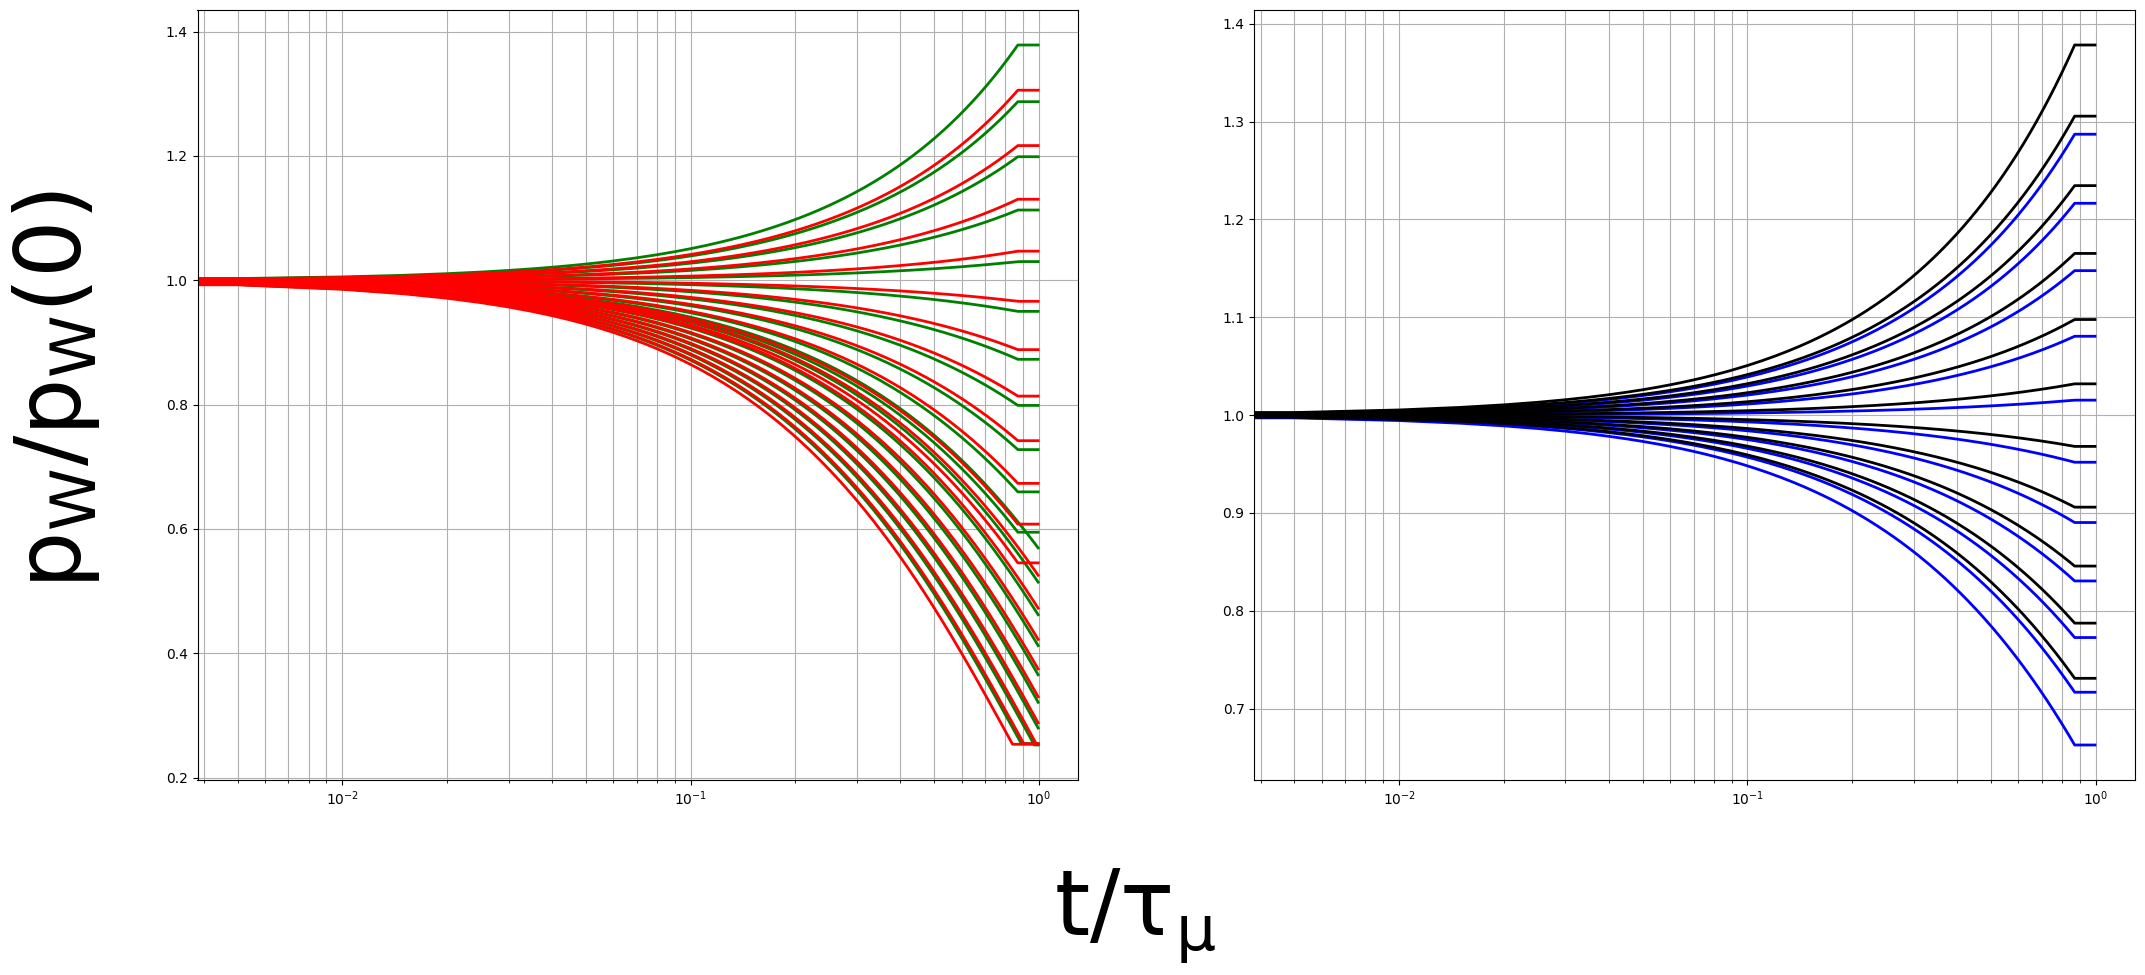

In [191]:
fig,ax = plt.subplots(1,2,figsize=(25,10))
fig.supylabel("$\mathregular{p_W/p_W(0)}$",x=0.05,fontsize=65)
# ax[0].plot(np.arange(0,500)*dt_list,p_norm[:,6,0].T,'ro',alpha=0.1)
std_norm = np.std(p_norm,0)
# ax[0].fill_between(np.arange(0,500)*dt_list,(avg_p1-std_norm)[6,0],(avg_p1+std_norm)[6,0],color='green',alpha=0.3)
ax[0].plot(np.arange(0,Tsim)*dt_list,avg_p1[:,0].T,'g',lw=2,label=beta1_lin[6].round(2))
ax[0].plot(np.arange(0,Tsim)*dt_list,avg_p1[:,1].T,'r',lw=2,label=beta1_lin[8].round(2))
ax[0].grid(which='both')
ax[0].set_xscale('log')

ax[1].plot(np.arange(0,Tsim)*dt_list,avg_p1[1,:].T,'b',lw=2)
# ax[1].plot(np.arange(0,Tsim)*dt_list,avg_p1[2,:].T,'k',lw=2)
# ax[1].plot(np.arange(0,Tsim)*dt_list,avg_p1[1,:].T,'k',lw=2)
ax[1].plot(np.arange(0,Tsim)*dt_list,avg_p1[0,:].T,'k',lw=2)
ax[1].grid(which='both')
ax[1].set_xscale('log')
# ax[1].set_yscale('log')
fig.supxlabel("$\mathregular{t/\\tau_\mu}$",fontsize=65,y=-0.075)

lines_labels = [axi.get_legend_handles_labels() for axi in ax]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Finally, the legend (that maybe you'll customize differently)
# fig.legend(lines, labels, prop=font, loc='lower center', ncols=3, bbox_to_anchor = (0.5,-0.25))
# plt.savefig("PerimeterPython2T1.pdf", dpi = 200,bbox_inches='tight')

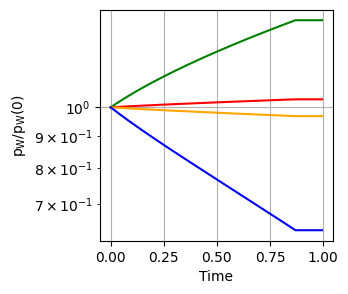

In [192]:
plt.figure(figsize=(3,3))
plt.plot(np.arange(0,Tsim)*dt_list,avg_p1[0,0].T,'g' ,label = "$p_0 = 0$, $\lambda_W = 2$")
plt.plot(np.arange(0,Tsim)*dt_list,avg_p1[4,0].T, 'r' ,label = "$p_0 = 0$, $\lambda_W = 3.5$")
plt.plot(np.arange(0,Tsim)*dt_list,avg_p1[0,6].T,color='orange', label = "$p_0 = 3.5$, $\lambda_W = 0$")
plt.plot(np.arange(0,Tsim)*dt_list,avg_p1[3,8].T, 'b',label = "$p_0 = 4$, $\lambda_W = 1.5$")
plt.xlabel('Time')
plt.ylabel('$\mathregular{p_W/p_W(0)}$')
# plt.legend(fontsize=7)
# plt.ylim(0.0,2.5)
plt.yscale('log')
plt.grid()
# plt.savefig("HexagonPartial.pdf", dpi = 200,bbox_inches='tight')

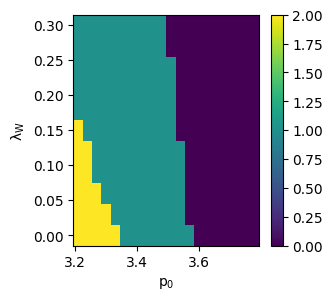

In [205]:
plt.figure(figsize=(3,3))
plt.pcolormesh(beta2_lin[:],lambda2_lin,np.floor((avg_p1[:,:,-1]/avg_p1[:,:,0]).T)+np.floor((avg_p2[:,:,-1]/avg_p2[:,:,0]).T))
# plt.clim(0.9,2)
plt.xlabel("$\mathregular{p_0}$")
plt.ylabel("$\mathregular{\lambda_W}$")
plt.colorbar()

In [31]:
beta2res = beta1_lin[1]
lambda2res = lambda1_lin[1]

# Eigenvalues stuff

In [43]:
t_scale = np.zeros((len(LW1_list),len(L1_list)))
c_scale = np.zeros((len(LW1_list),len(L1_list)))
for i in range(len(L1_list)):
    for j in range(len(LW1_list)):
        lij = int(avg_t[i,j])
        x_normalized = (avg_p2[i,j,:int(2*lij/3)-1]-np.min(avg_p2[i,j,:int(2*lij/3)-1]))/(np.max(avg_p2[i,j,:int(2*lij/3)-1])-np.min(avg_p2[i,j,:int(2*lij/3)-1]))
        y = np.log(np.abs(np.diff(x_normalized))+10**(-16))
        x = (np.arange(lij)*dt_list)[:int(2*lij/3)][:-2]
        reg4 = LinearRegression().fit(x.reshape(-1, 1),y)
        t_scale[j,i] = (reg4.coef_)[0].round(5)
        c_scale[j,i] = (reg4.intercept_).round(5)

Text(0.5, 1.0, '$<\\log|\\dot{p_W}|/t>$')

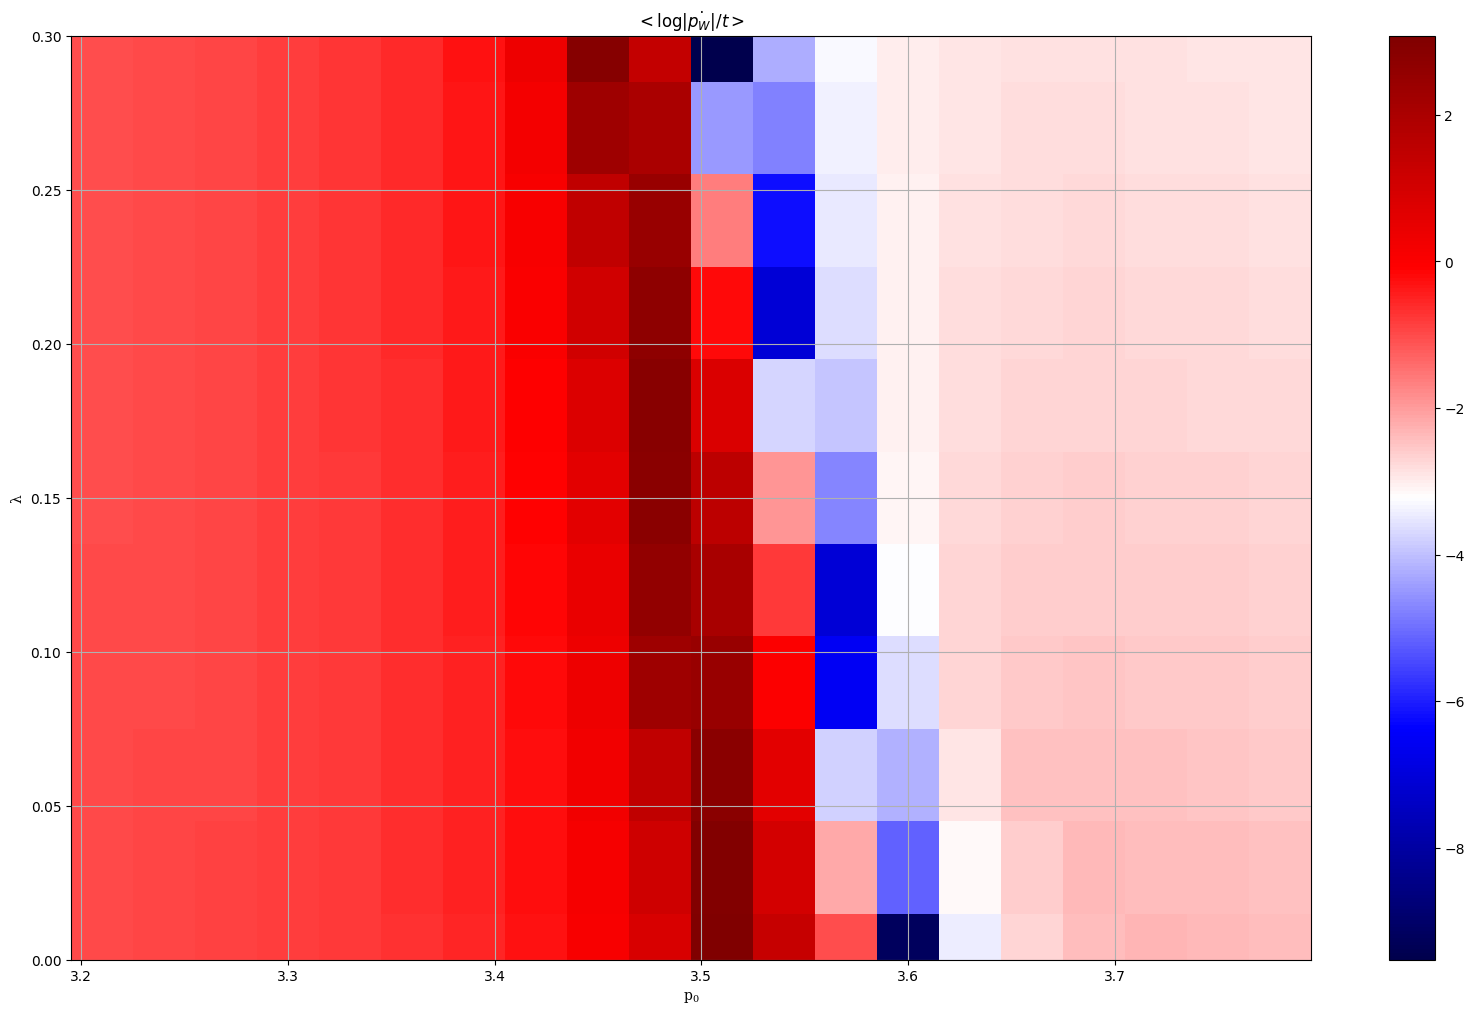

In [45]:
plt.figure(figsize=(20,12))
plt.pcolormesh(beta2_lin[:],lambda2_lin[:],t_scale,cmap="seismic")
# plt.plot(p_v,lc,'g--',lw=7.5,label='Fit (1)')
# plt.plot(0*beta2+pt, beta2,'k--',lw=7.5,label='Fit (Transition)')
plt.ylim(0,0.3)
plt.colorbar()
# plt.clim(-2,2)
plt.grid(which='both')
plt.xlabel("$\mathregular{p_0}$",fontdict= {'family':'serif'})
plt.ylabel("$\mathregular{\lambda}$",fontdict= {'family':'serif'})
# plt.legend(prop=font1,loc = "best")
plt.title("$<\log|\dot{p_W}|/t>$")
# plt.savefig("PerimeterChangeTransition1.pdf", dpi = 600,bbox_inches='tight')

Text(0.5, 1.0, '$\\mathregular{\\beta_1}$')

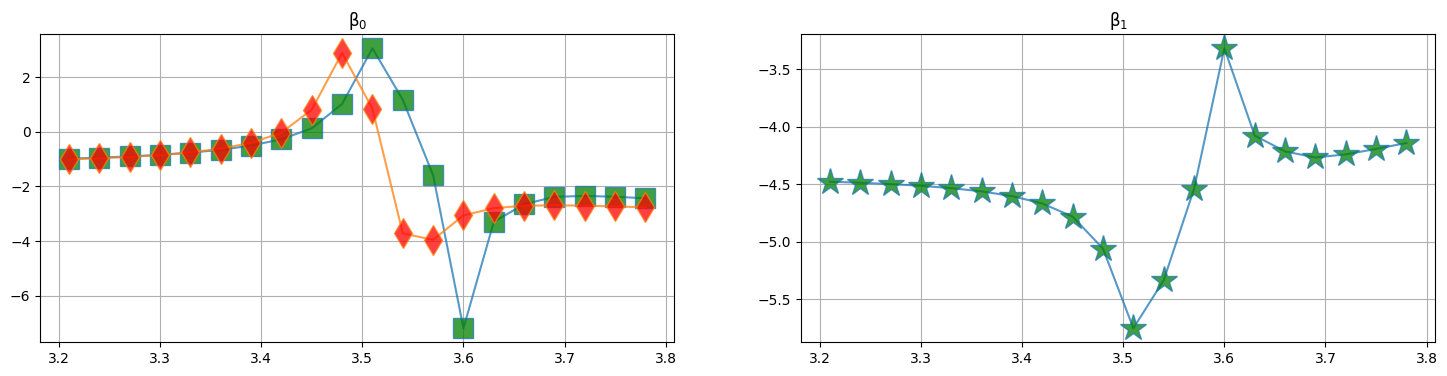

In [46]:
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.plot(beta2_lin,np.mean(t_scale[0:2,:],axis=0),'s-',ms=15,mfc = 'g',alpha=0.75)
plt.plot(beta2_lin,np.mean(t_scale[6:7,:],axis=0),'d-',ms=15,mfc = 'r',alpha=0.75)
plt.title("$\mathregular{\\beta_0}$")
#plt.plot(beta2,t_scale[5,:],'o-',ms=20)
plt.grid(which='both')
#plt.plot(beta2,c_scale[0,:])
plt.subplot(122)
plt.plot(beta2_lin,np.mean(c_scale[0:2],axis=0),'*-',ms=20,mfc = 'g',alpha=0.75)
#plt.xlim(0,10)
#plt.plot(lambda2,t_scale[:,1],'*-',ms=20)
plt.grid(which='both')
plt.title("$\mathregular{\\beta_1}$")
#plt.plot(lambda2,c_scale[:,0])



In [47]:
t0_scale = np.zeros((len(LW1_list),len(L1_list)))
c0_scale = np.zeros((len(LW1_list),len(L1_list)))
for i in range(len(L1_list)):
    for j in range(len(LW1_list)):
        lij = int(avg_t[i,j])
        x_normalized = (avg_p2[i,j,int(1*lij/10):int(2*lij/3)+1]-np.min(avg_p2[i,j,int(1*lij/10):int(2*lij/3)+1]))/(np.max(avg_p2[i,j,int(1*lij/10):int(2*lij/3)+1])-np.min(avg_p2[i,j,int(1*lij/10):int(2*lij/3)+1]))
        y = x_normalized[1:]
        x = x_normalized[:-1]
        reg4 = LinearRegression(fit_intercept = False).fit(x.reshape(-1, 1),y)
        t0_scale[j,i] = (((reg4.coef_-1)))[0].round(5)
        # c0_scale[j,i] = (reg4.intercept_).round(5)

Text(0.5, 1.0, '$<\\log|\\dot{p_W}|/t>$')

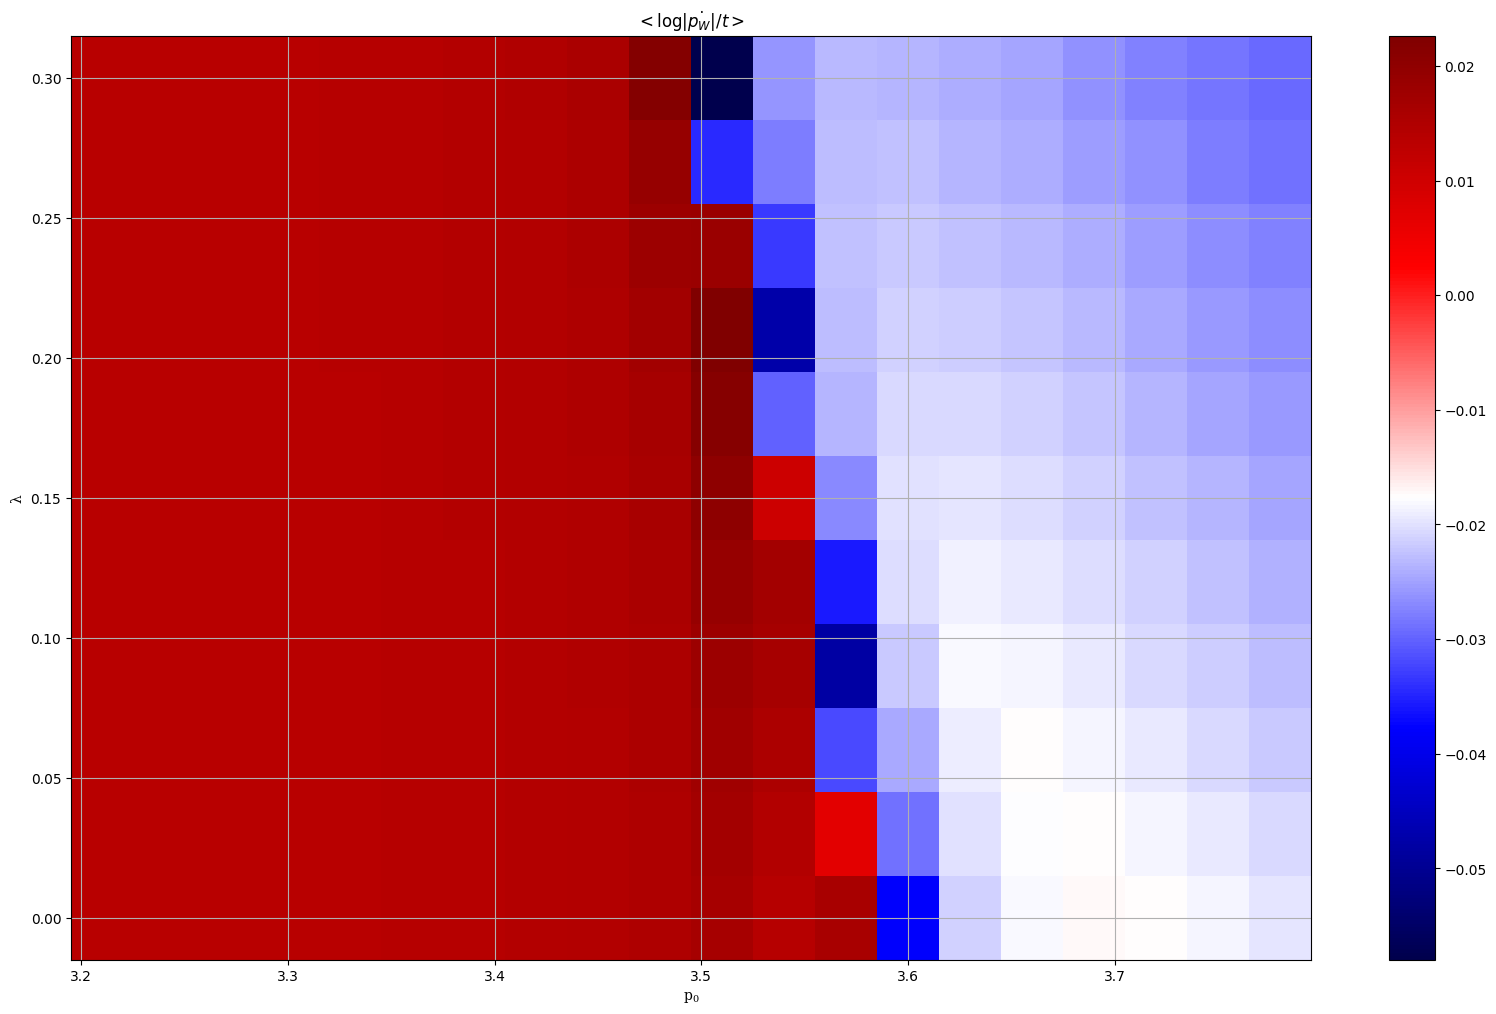

In [48]:
plt.figure(figsize=(20,12))
plt.pcolormesh(beta2_lin[:],lambda2_lin[:],t0_scale,cmap="seismic")
# plt.plot(p_v,lc,'g--',lw=7.5,label='Fit (1)')
# plt.plot(0*p_v+pt, p_v,'k--',lw=7.5,label='Fit (Transition)')
# plt.ylim(0,6)
plt.colorbar()
# plt.clim(-0.1,0.1)
plt.grid(which='both')
plt.xlabel("$\mathregular{p_0}$",fontdict= {'family':'serif'})
plt.ylabel("$\mathregular{\lambda}$",fontdict= {'family':'serif'})
# plt.legend(prop=font1,loc = "best")
plt.title("$<\log|\dot{p_W}|/t>$")
# plt.savefig("PerimeterChangeTransition1.pdf", dpi = 600,bbox_inches='tight')

In [49]:
def corrfunc(x,y,T):
    f = np.zeros(T)
    for i in range(T):
        xf = len(x)-i
        f[i] = np.corrcoef(x[0:xf]*y[i:])
    return f

In [52]:
cormat = np.zeros((len(beta2_lin),len(lambda2_lin),250))
for i in range(len(lambda2_lin)):
    for j in range(len(beta2_lin)):
        cormat[j,i] = np.correlate(avg_p2[j,i],avg_p2[j,i],'full')[:][:250]/np.correlate(avg_p2[j,i],avg_p2[j,i],'valid')



Text(0, 0.5, '$\\mathregular{\\lambda}$')

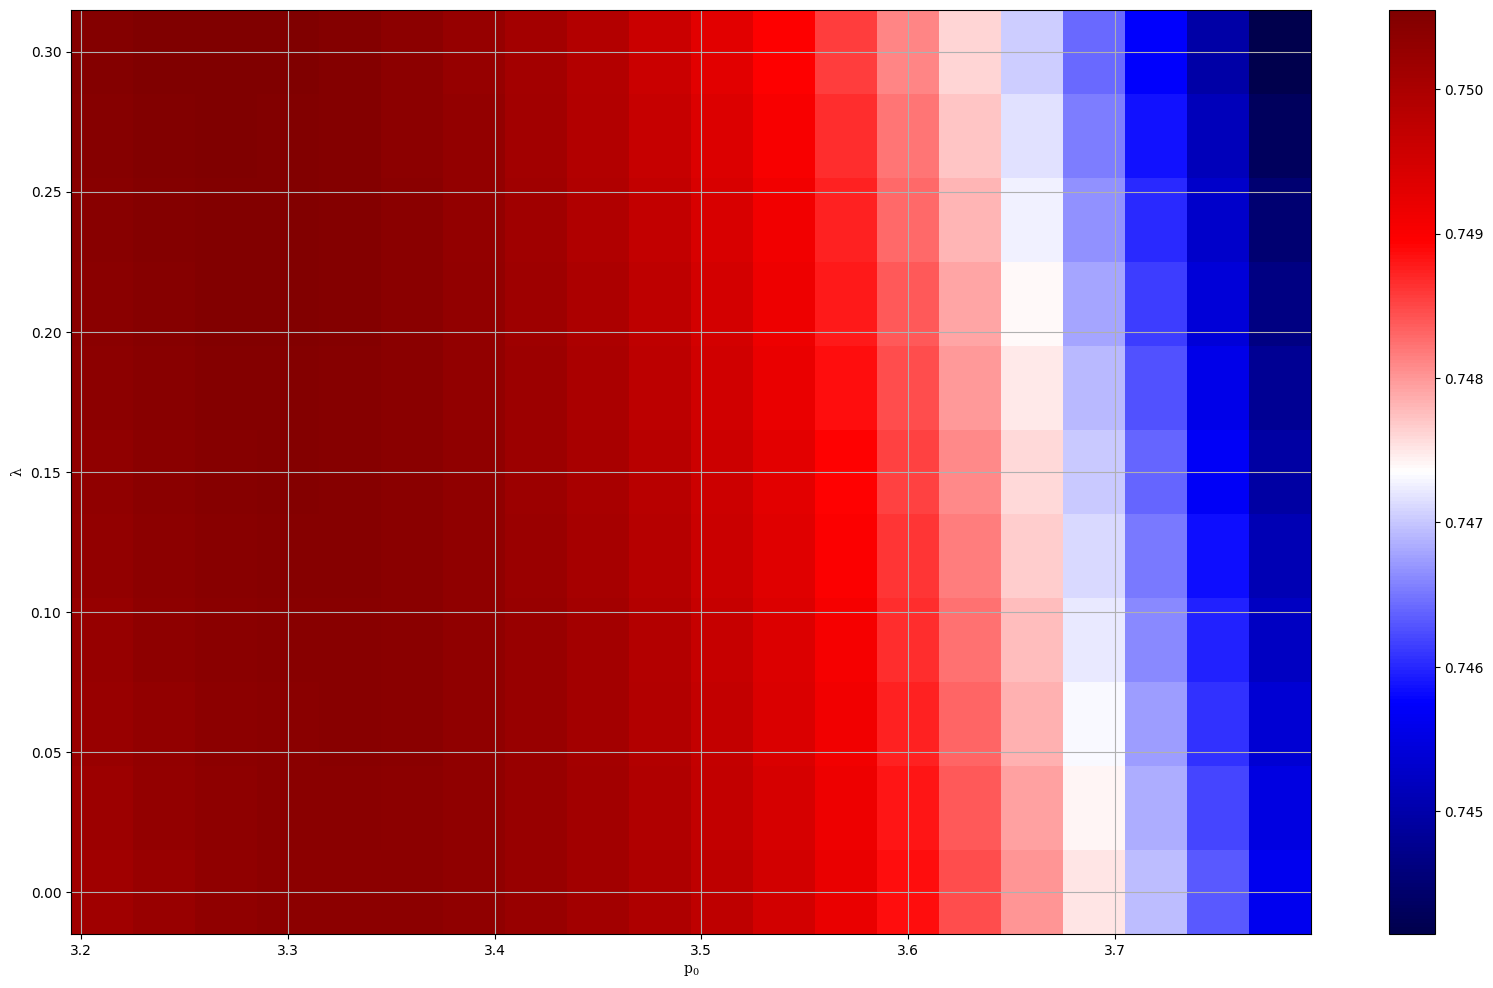

In [53]:
plt.figure(figsize=(20,12))
plt.pcolormesh(beta2_lin[:],lambda2_lin[:],(cormat[:,:,-1].T),cmap="seismic")
# plt.plot(p_v,lc,'g--',lw=7.5,label='Fit (1)')
# plt.plot(0*p_v+pt, p_v,'k--',lw=7.5,label='Fit (Transition)')
# plt.ylim(0,6)
plt.colorbar()
#plt.clim(0,3)
plt.grid(which='both')
plt.xlabel("$\mathregular{p_0}$",fontdict= {'family':'serif'})
plt.ylabel("$\mathregular{\lambda}$",fontdict= {'family':'serif'})
# plt.legend(prop=font1,loc = "best")
#plt.title("$<\log|\dot{p_W}|/t>$")
# plt.savefig("PerimeterChangeTransition1.pdf", dpi = 600,bbox_inches='tight')

Text(0.5, 1.0, '$\\mathregular{\\beta_1}$')

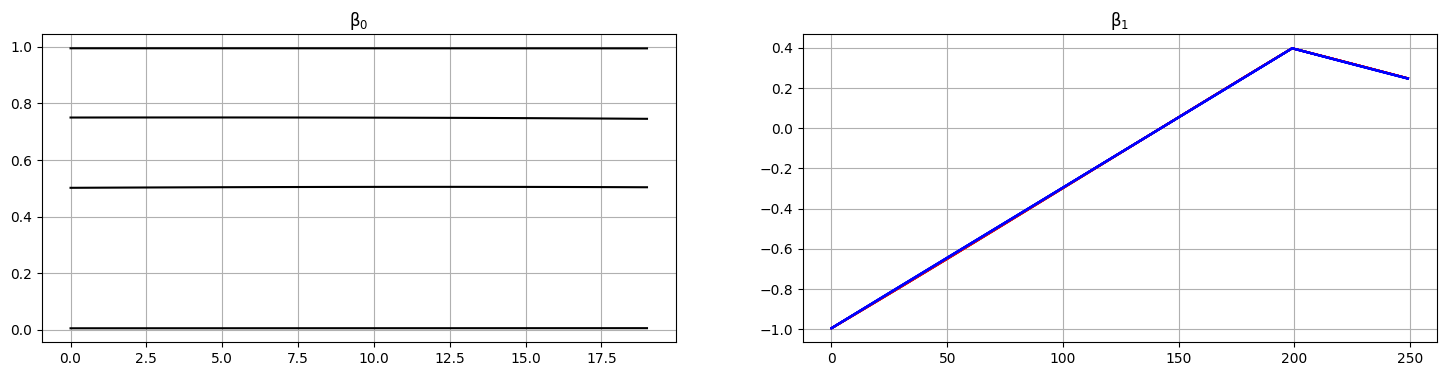

In [54]:
plt.figure(figsize=(18,4))
p = np.arange(0,8)
plt.subplot(121)

plt.plot(cormat[:,0,0],'k')
plt.plot(cormat[:,0,100],'k')
plt.plot(cormat[:,0,200],'k')
plt.plot(cormat[:,0,-1],'k')

# plt.plot(beta2,t_scale[p,:].T,'gs-',ms=10,mfc = 'g',alpha=0.2)
# plt.plot(beta2,t0_scale[p,:].T,'rd-',ms=10,mfc = 'r',alpha=0.2)
# plt.plot(0*beta2+3.6,7*(beta2/7.5-0.5),'k-',lw=5,alpha=1)
plt.title("$\mathregular{\\beta_0}$")
#plt.plot(beta2,t_scale[5,:],'o-',ms=20)
plt.grid(which='both')
#plt.plot(beta2,c_scale[0,:])
plt.subplot(122)
lin = 1-(0.5)*np.arange(0,250)/250
plt.plot(cormat[0,0]-lin,'k')
plt.plot((cormat[1:8,0]-lin).T,'r')
plt.plot((cormat[20:,0]-lin).T,'g')
plt.plot((cormat[9:15,0]-lin).T,'b')
#plt.xlim(0,10)
#plt.plot(lambda2,t_scale[:,1],'*-',ms=20)
plt.grid(which='both')
plt.title("$\mathregular{\\beta_1}$")
#plt.plot(lambda2,c_scale[:,0])

In [55]:

cormatt = np.zeros((len(beta2_lin),len(lambda2_lin)))
for i in range(len(lambda2_lin)):
    for j in range(len(beta2_lin)):
        cormatt[j,i] = find_peaks(np.abs(cormat[j,i]-lin))[0][0]

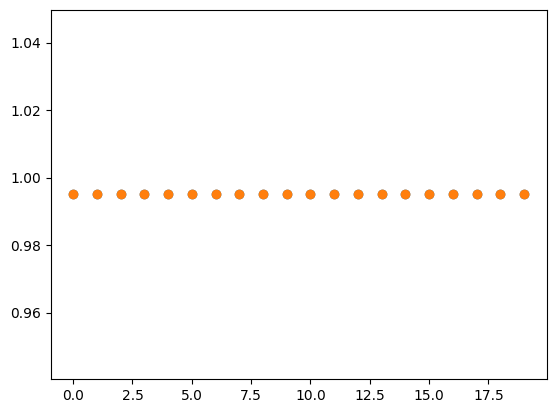

In [56]:
plt.plot(cormatt[:,0]*dt_list,'o')
plt.plot(cormatt[:,8]*dt_list,'o')


Text(0.5, 1.0, '$\\mathregular{\\beta_1}$')

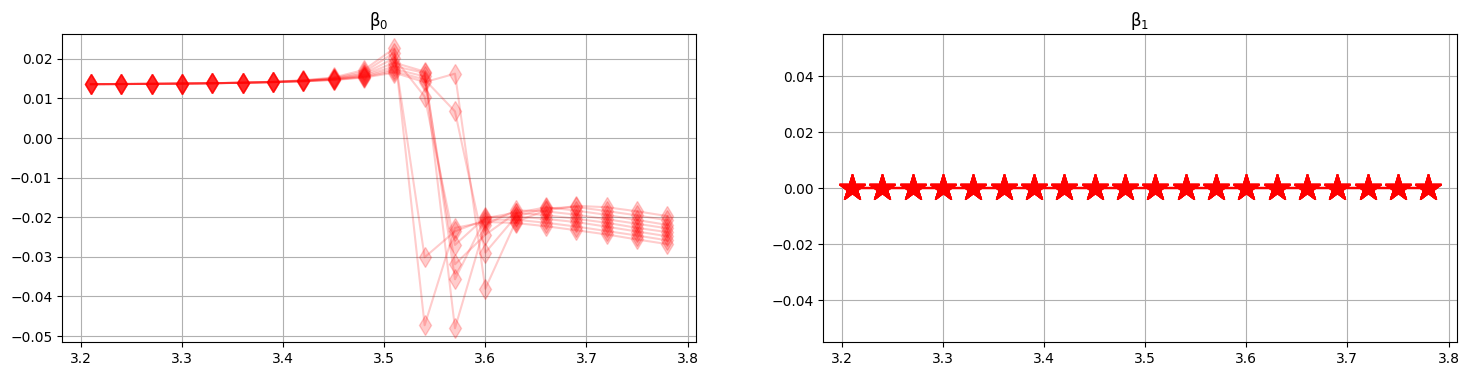

In [80]:
plt.figure(figsize=(18,4))
p = np.arange(0,8)
plt.subplot(121)
# plt.plot(beta2_lin,t_scale[p,:].T,'gs-',ms=10,mfc = 'g',alpha=0.2)
plt.plot(beta2_lin,t0_scale[p,:].T,'rd-',ms=10,mfc = 'r',alpha=0.2)
# plt.plot(0*beta2_lin+3.6,7*(beta2_lin/7.5-0.5),'k-',lw=5,alpha=1)
plt.title("$\mathregular{\\beta_0}$")
#plt.plot(beta2,t_scale[5,:],'o-',ms=20)
plt.grid(which='both')
#plt.plot(beta2,c_scale[0,:])
plt.subplot(122)
# plt.plot(beta2_lin,c_scale[p].T,'g*-',ms=20,mfc = 'g',alpha=0.75)
plt.plot(beta2_lin,c0_scale[p].T,'r*-',ms=20,mfc = 'r',alpha=0.75)
#plt.xlim(0,10)
#plt.plot(lambda2,t_scale[:,1],'*-',ms=20)
plt.grid(which='both')
plt.title("$\mathregular{\\beta_1}$")
#plt.plot(lambda2,c_scale[:,0])



In [74]:
P = np.arange(11,20)
p = 7
mean_ts = np.zeros((p,20))


for k  in range(0,p):
    avg_ts = list(t_scale[k,:20-k])
    
    
    for i in range(k):
        avg_ts.insert(0,avg_ts[0])

    mean_ts[k] = np.array(avg_ts)

Text(0.5, 1.0, 'Eigenvalue')

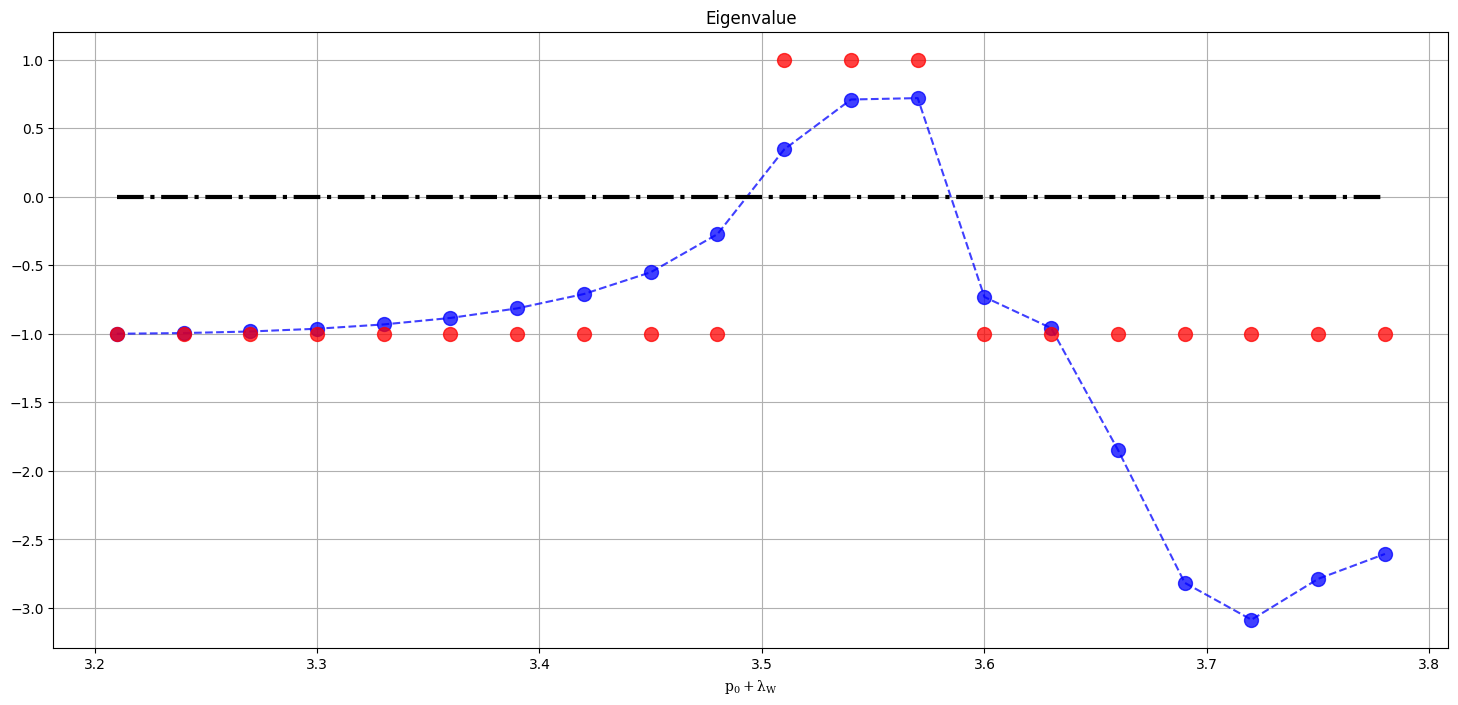

In [75]:
plt.figure(figsize=(18,8))
plt.plot(beta2_lin,np.mean(mean_ts,0),'bo--',ms=10,mfc = 'b',alpha=0.75)
unsteig = np.array(np.mean(mean_ts,0)>0,int)
steig = np.array(np.mean(mean_ts,0)<0,int)
plt.plot(beta2_lin,unsteig-steig,'ro',ms=10,alpha=0.75,label='Stability')
plt.plot(beta2_lin,beta2_lin*0,'k-.',lw=3)
# plt.fill_between(beta2_lin,np.mean(mean_ts,0)-2*np.std(mean_ts,0),np.mean(mean_ts,0)+2*np.std(mean_ts,0),color = 'blue',alpha=0.3,label = "$\pm \mathregular{2\sigma}$")
plt.grid(which='both')
plt.xlabel("$\mathregular{p_0+\lambda_W}$",fontdict= {'family':'serif'})
# plt.legend(prop=font1,loc = "best")
plt.title('Eigenvalue')
#plt.ylim(-4,2)

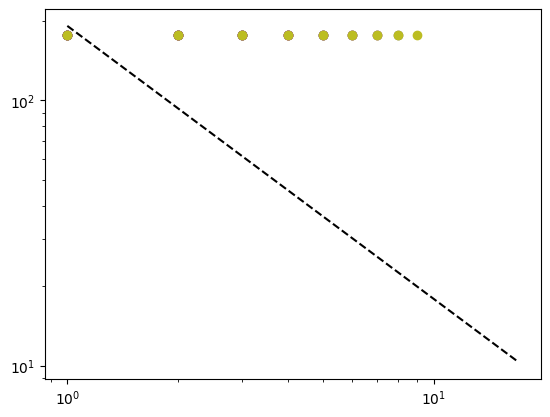

In [63]:
plt.plot(avg_t[0,8:-1],'o')
plt.plot(avg_t[1,7:-1],'o')
plt.plot(avg_t[2,6:-1],'o')
plt.plot(avg_t[3,5:-1],'o')
plt.plot(avg_t[4,4:-1],'o')
plt.plot(avg_t[5,3:-1],'o')
plt.plot(avg_t[6,2:-1],'o')
plt.plot(avg_t[7,1:-1],'o')
plt.plot(avg_t[8,0:-1],'o')
plt.plot(np.arange(1,18),191*np.arange(1,18)**(-1.03),'k--')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(7,18)

# Closure boundary and time

In [15]:
mean_t1 = np.zeros((11,11))

p = 11
for k  in range(0,p):
    avg_1 = list(avg_t[k,p-(k+1):])
    for i in range(p-(k+1)):
        avg_1.append(0)
    mean_t1[k] = np.array(avg_1)*dt_list

In [16]:
mean_t2 = np.zeros(11)
std_t2 = np.zeros(11)
mean_t2[:5] = np.mean(mean_t1[:,:5],0)
std_t2[:5] = np.std(mean_t1[:,:5],0)
for k in range(0,11):
    mean_t2[k] = np.mean(mean_t1[k:,k],0)
    std_t2[k] = np.std(mean_t1[k:,k],0)

In [17]:
meanl = np.mean(array_lw,0)
stdl = np.std(array_lw,0)
meanb = np.mean(array_p0,0)
stdb = np.std(array_p0,0)
stdprop = (stdl**2+stdb**2)**(0.5)

In [19]:
diff_a1.shape

(1, 11, 11, 199)

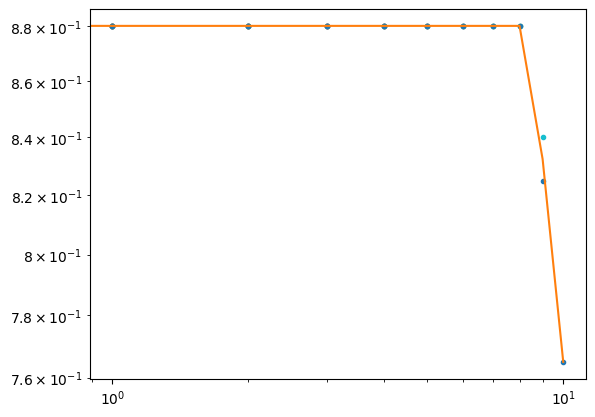

In [20]:
plt.plot(mean_t1.T,'.')
plt.plot(mean_t2)
plt.xscale('log')
plt.yscale('log')

# Visualization 2

1.26
-4.22636363636364
2.18
3.608196721311472


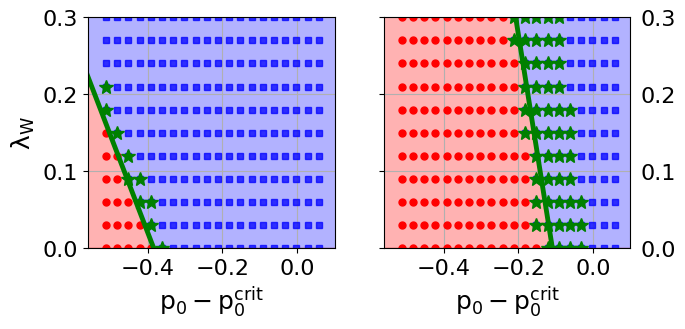

In [206]:
plt.figure(figsize=(7,3))
plt.subplot(121)
# plt.plot(np.arange(0,Tsim1)*dt_list1,avg_p2[0,3].T,'g' ,label = "$p_0 = 0$, $\lambda_W = 2$")
# plt.plot(np.arange(0,Tsim1)*dt_list1,avg_p2[0,2].T, 'r' ,label = "$p_0 = 0$, $\lambda_W = 3.5$")
# plt.plot(np.arange(0,Tsim1)*dt_list1,avg_p2[1,0].T,color='orange', label = "$p_0 = 3.5$, $\lambda_W = 0$")
# plt.plot(np.arange(0,Tsim1)*dt_list1,avg_p2[2,1].T, 'b',label = "$p_0 = 4$, $\lambda_W = 1.5$")
# plt.xlabel("$\mathregular{t/\\tau_\mu}$",fontsize=18)
# plt.ylabel('$\mathregular{p_W/p_W(0)}$',fontsize=18)
# # plt.legend(fontsize=7)
# # plt.ylim(0.0,2.5)
# plt.yscale('log',base=10)
# plt.xticks(fontsize=16)
# plt.yticks([1,0.1],labels=[1,0.1],fontsize=16)
# plt.grid()

plt.plot(np.array(longa_p0)-3.722,np.array(longa_lw),'ro',alpha=1,ms=5,label='Opening')
plt.plot(np.array(longf_p0)-3.722,np.array(longf_lw),'bs',alpha=0.75,ms=5,label='Closure')

plt.plot(np.array(long2_p0)-3.722,np.array(long2_lw),'g*',alpha=1,ms=10,label='P. closure')
# plt.plot(np.array(long3_p0),np.array(long3_lw),'kd',alpha=0.75,ms=10,label='Recoil')
y = np.array(long2_lw)
x = np.array(long2_p0)
reg42 = LinearRegression().fit(x.reshape(-1, 1),y)
x_test = np.arange(0,1000)/1000*5
y_fit = reg42.coef_.round(2)[0]*x_test+reg42.intercept_
print(-reg42.coef_.round(2)[0])
print(-reg42.intercept_)
y_theo = np.sqrt(1)*1.265*(3.338-x_test)
# y2_theo = np.sqrt(10)*11.6604*(3.803-x_test)**(3/2)*(0.752+x_test)**(-1/2)
# y3_theo = 3.14*(3.401-x_test)**(3/2)
plt.plot(x_test-3.722,y_theo,'g',lw=3.5)
# plt.plot(x_test,y2_theo,'k--',lw=3.5)
# plt.plot(x_test,y2_theo,'k--',lw=10.5,label='Bif. thresh')
# plt.plot(x_test,y_fit,'g-',lw=3.5)
# plt.plot(x_test,x_test,'r-',lw=3.5)
# plt.fill_between(x_test,y_fit-np.mean(stdprop),y_fit+np.mean(stdprop),color = 'yellow',alpha=0.75)
plt.fill_between(x_test-3.722,0*y_fit,y_theo,color = 'red',alpha=0.3,label = "I")
plt.fill_between(x_test-3.722,y_theo,0*y_fit+12,color = 'blue',alpha=0.3,label = "III$_b$")
# plt.fill_between(x_test,y2_theo,0*y_fit+12,color = 'blue',alpha=0.75,label = "III$_a$")
# plt.fill_between(x_test+3.7,0*y_fit,0*y_fit+12,color = 'blue',alpha=0.75)
plt.xlabel("$\mathregular{p_0}-\mathregular{p^{crit}_0}$",fontsize=18)
plt.ylabel("$\mathregular{\lambda_W}$",fontsize=18)
plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
#plt.fill_betweenx(meanl, meanb-2*stdb,meanb+2*stdb,alpha=0.5)
plt.grid(which="both")
plt.ylim(0.0,0.3)
plt.xlim(-0.56,0.1)
plt.tick_params(axis='y',labelright=False,labelleft=True,labelsize=16)

plt.subplot(122)
plt.plot(np.array(longa_p01)-3.722,np.array(longa_lw1),'ro',alpha=1,ms=5,label='Opening')
plt.plot(np.array(longf_p01)-3.722,np.array(longf_lw1),'bs',alpha=0.75,ms=5,label='Closure')

plt.plot(np.array(long2_p01)-3.722,np.array(long2_lw1),'g*',alpha=1,ms=10,label='P. closure')
# plt.plot(np.array(long3_p0),np.array(long3_lw),'kd',alpha=0.75,ms=10,label='Recoil')
y = np.array(long_lw1)
x = np.array(long_p01)
reg42 = LinearRegression().fit(x.reshape(-1, 1),y)
x_test = np.arange(0,1000)/1000*5
y_fit = reg42.coef_.round(2)[0]*x_test+reg42.intercept_
print(-reg42.coef_.round(2)[0])
print(-reg42.intercept_/reg42.coef_.round(2)[0])
y_theo = 3.05*(3.613-x_test) #Fit das derivadas
# y2_theo = np.sqrt(10)*11.6604*(3.803-x_test)**(3/2)*(0.752+x_test)**(-1/2)
# y3_theo = 3.14*(3.401-x_test)**(3/2)
plt.plot(x_test-3.722,y_theo,'g',lw=3.5)
# plt.plot(x_test,y2_theo,'k--',lw=3.5)
# plt.plot(x_test,y2_theo,'k--',lw=10.5,label='Bif. thresh')
# plt.plot(x_test,y_fit,'g-',lw=3.5)
# plt.plot(x_test,x_test,'r-',lw=3.5)
# plt.fill_between(x_test,y_fit-np.mean(stdprop),y_fit+np.mean(stdprop),color = 'yellow',alpha=0.75)
plt.fill_between(x_test-3.722,0*y_fit,y_theo,color = 'red',alpha=0.3,label = "I")
plt.fill_between(x_test-3.722,y_theo,0*y_fit+12,color = 'blue',alpha=0.3,label = "III$_b$")
# plt.fill_between(x_test,y2_theo,0*y_fit+12,color = 'blue',alpha=0.75,label = "III$_a$")
# plt.fill_between(x_test+3.7,0*y_fit,0*y_fit+12,color = 'blue',alpha=0.75)
plt.xlabel("$\mathregular{p_0}-\mathregular{p^{crit}_0}$",fontsize=18)
# plt.ylabel("$\mathregular{\lambda_W}$",fontsize=18)
plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
#plt.fill_betweenx(meanl, meanb-2*stdb,meanb+2*stdb,alpha=0.5)
plt.grid(which="both")
plt.ylim(0.0,0.3)
plt.xlim(-0.56,0.1)
plt.tick_params(axis='y',labelright=True,labelleft=False,labelsize=16)

# plt.legend(loc = "upper center",ncols=3,bbox_to_anchor = (0.5,1.5))
# plt.legend(prop=font,loc = "lower center",ncols=3,bbox_to_anchor = (.5,-0.55))
plt.savefig("HexagonBoundary.pdf", dpi = 200,bbox_inches='tight')

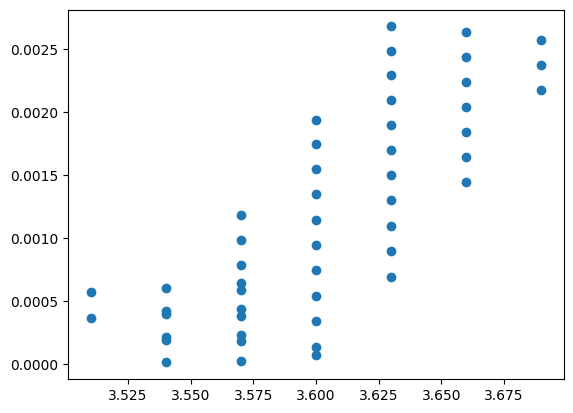

In [166]:
plt.plot(long2_p01,np.abs(list2_diffa1[0]),'o')

In [ ]:
plt.plot()

The boundary changes depending on the tissue considered, factors that impact the change of boundary are the number of sides and the size of the wound (as they determine the scaling of the results)

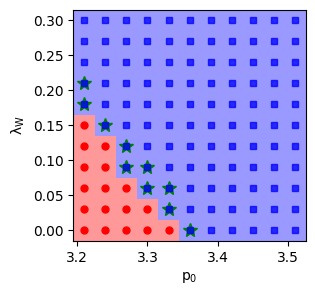

In [121]:
plt.figure(figsize=(3,3))
plt.pcolormesh(beta1_lin,lambda1_lin,diff_a1[0,:,:,2].T/dt_list>0,cmap='seismic')
plt.clim(-2,3)
# plt.colorbar()
plt.plot(np.array(long2_p0),np.array(long2_lw),'g*',alpha=1,ms=10,label='P. closure')
plt.plot(np.array(longa_p0),np.array(longa_lw),'ro',alpha=1,ms=5,label='Opening')
plt.plot(np.array(longf_p0),np.array(longf_lw),'bs',alpha=0.75,ms=5,label='Closure')
plt.xlabel("$\mathregular{p_0}$")
plt.ylabel("$\mathregular{\lambda_W}$")
# plt.xlim(3.5,3.65)
plt.savefig("HexagonGradient1.png", dpi = 200,bbox_inches='tight')

Para Nw = 1

In [133]:
x1 = [3.21,3.24,3.27,3.30,3.33]
y1 = [0.15,0.12,0.06,0.03,0.]
y = np.array(y1)
x = np.array(x1)
reg1 = LinearRegression().fit(x.reshape(-1, 1),y)
print(-reg1.coef_.round(2)[0])
print(-reg1.intercept_/reg1.coef_.round(2)[0])

x1 = [3.21,3.24,3.27,3.3,3.33,3.36]
y1 = [0.18,0.15,0.09,0.06,0.03,0.0]
y = np.array(y1)
x = np.array(x1)
reg2 = LinearRegression().fit(x.reshape(-1, 1),y)
print(-reg2.coef_.round(2)[0])
print(-reg2.intercept_/reg2.coef_.round(2)[0])

x1 = [3.21,3.24,3.27,3.3,3.33,3.36]
y1 = [0.165,0.135,0.075,0.045,0.015,0]
y = np.array(y1)
x = np.array(x1)
reg2 = LinearRegression().fit(x.reshape(-1, 1),y)
print(-reg2.coef_.round(2)[0])
print(-reg2.intercept_/reg2.coef_.round(2)[0])

1.3
3.3253846153846185
1.23
3.350290360046461
1.16
3.339408866995077


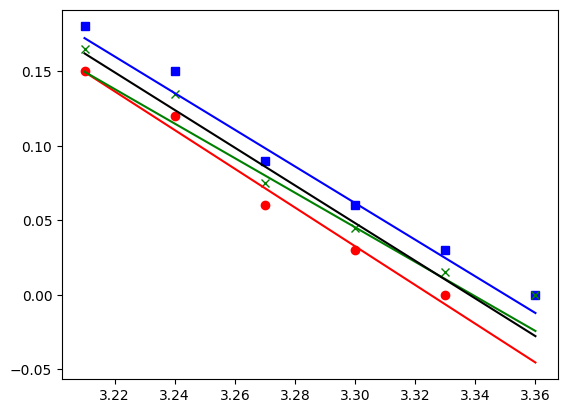

In [143]:
plt.plot([3.21,3.24,3.27,3.30,3.33],[0.15,0.12,0.06,0.03,0.],'ro')
plt.plot([3.21,3.24,3.27,3.3,3.33,3.36],[0.18,0.15,0.09,0.06,0.03,0.0],'bs')
plt.plot(x1,y1,'gx')
plt.plot(x1,-1.3*(np.array(x1)-3.325),'r')
plt.plot(x1,-1.23*(np.array(x1)-3.350),'b')
plt.plot(x1,-1.16*(np.array(x1)-3.339),'g')
plt.plot(x1,-1.265*(np.array(x1)-3.338),'k')


Para Nw = 10

In [146]:
x1 = [3.51,3.54,3.57,3.60]
y1 = [0.3,0.21,0.12,0]
y = np.array(y1)
x = np.array(x1)
reg1 = LinearRegression().fit(x.reshape(-1, 1),y)
print(-reg1.coef_.round(2)[0])
print(-reg1.intercept_/reg1.coef_.round(2)[0])

x1 = [3.54,3.57,3.60,3.63]
y1 = [0.24,0.15,0.03,0]
y = np.array(y1)
x = np.array(x1)
reg2 = LinearRegression().fit(x.reshape(-1, 1),y)
print(-reg2.coef_.round(2)[0])
print(-reg2.intercept_/reg2.coef_.round(2)[0])

x1 = [3.54,3.57,3.60,3.63,3.51]
y1 = [0.225,0.18,0.015,0,0.3]
y = np.array(y1)
x = np.array(x1)
reg2 = LinearRegression().fit(x.reshape(-1, 1),y)
print(-reg2.coef_.round(2)[0])
print(-reg2.intercept_/reg2.coef_.round(2)[0])

3.3
3.6027272727272623
2.8
3.6225000000000045
2.7
3.623333333333331


/tmp/ipykernel_493641/2933324983.py:4: RuntimeWarning: invalid value encountered in power
  y2 = np.sqrt(10)*11.6604*(3.806-p_axis)**(3/2)*(0.752+p_axis)**(-1/2)#np.sqrt(10)*1.9*(3.806-p_axis)**(3/2)#


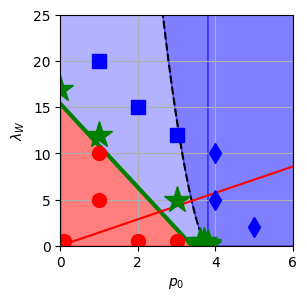

In [172]:
fig = plt.figure(figsize=(3,3))
p_axis = np.arange(0,5000)/5000*6
y1 = np.sqrt(10)*1.429*(3.4-p_axis)
y2 = np.sqrt(10)*11.6604*(3.806-p_axis)**(3/2)*(0.752+p_axis)**(-1/2)#np.sqrt(10)*1.9*(3.806-p_axis)**(3/2)#
ypos = 1.429*p_axis

p1 = [0.1,1,2,3,1]
l1 = [0.5,5,0.5,0.5,10]

p4 = [3,3.72,3.82,3.6,3.6,3.82,3.72,0,1]
l4 = [5,0.1,0.03,0.5,0.1,.3,.5,17,12]

p2 = [5,4,4]
l2 = [2,10,5]

p3 = [3,1,2]
l3 = [12,20,15]

plt.plot(p_axis,y1,'g',lw=3)
plt.plot(p_axis,y2,'k--')
plt.plot(p_axis,ypos,'r')
plt.plot(p1,l1,'ro',ms=10)
plt.plot(p4,l4,'g*',ms=20)
plt.plot(p2,l2,'bd',ms=10)
plt.plot(p3,l3,'bs',ms=10)
plt.ylim(0.0,25)
plt.xlim(0,6)

plt.fill_between(p_axis,0*y1,y1,color = 'red',alpha=0.5,label = "I")
plt.fill_between(p_axis,y1,y2,color = 'blue',alpha=0.3,label = "III$_b$")
plt.fill_between(p_axis,y2,0*y1+25,color = 'blue',alpha=0.5,label = "III$_a$")
plt.fill_between(p_axis+3.8,0*y1,0*y1+25,color = 'blue',alpha=0.5)

plt.xlabel("$p_0$")
plt.ylabel("$\lambda_W$")
plt.grid()
# plt.savefig("Hexagon10Diagram.png", dpi = 200,bbox_inches='tight')

In [183]:
xdif1 = np.array([0,0.5,0.5,1,1.5,2,2.5,2.5,3])
ydif1 = np.array([4,3.5,3,2.5,2,1.5,1,.5,0])
reg = LinearRegression().fit(xdif1.reshape(-1, 1),ydif1)
# x_test = np.arange(0,100)/100*5
# y_fit = reg42.coef_.round(2)[0]*x_test+reg42.intercept_
print(-reg.coef_.round(2)[0])
print(-reg.intercept_/reg.coef_.round(2)[0])

xdif2 = np.array([0.5,1,1,1.5,2,2.5,3,3,3.5])
ydif2 = np.array([4,3.5,3,2.5,2,1.5,1,.5,0])
reg = LinearRegression().fit(xdif2.reshape(-1, 1),ydif2)
# x_test = np.arange(0,100)/100*5
# y_fit = reg42.coef_.round(2)[0]*x_test+reg42.intercept_
print(-reg.coef_.round(2)[0])
print(-reg.intercept_/reg.coef_.round(2)[0])


xdif3 = np.array([0.5,1,1,1.5,2,2.5,3,3,3.5,0,0.5,0.5,1,1.5,2,2.5,2.5,3])
ydif3 = np.array([4,3.5,3,2.5,2,1.5,1,.5,0,4,3.5,3,2.5,2,1.5,1,.5,0])
reg = LinearRegression().fit(xdif3.reshape(-1, 1),ydif3)
# x_test = np.arange(0,100)/100*5
# y_fit = reg42.coef_.round(2)[0]*x_test+reg42.intercept_
print(-reg.coef_.round(2)[0])
print(-reg.intercept_/reg.coef_.round(2)[0])

1.28
3.059895833333333
1.28
3.5590277777777777
1.2
3.4204793028322444


-1.04
3.72093023255814
-0.66
0.20551560287779252


/tmp/ipykernel_473353/465986489.py:54: RuntimeWarning: divide by zero encountered in power
  mean_fit = np.exp(reg4.intercept_)*meanl2[:]**(reg4.coef_[0])


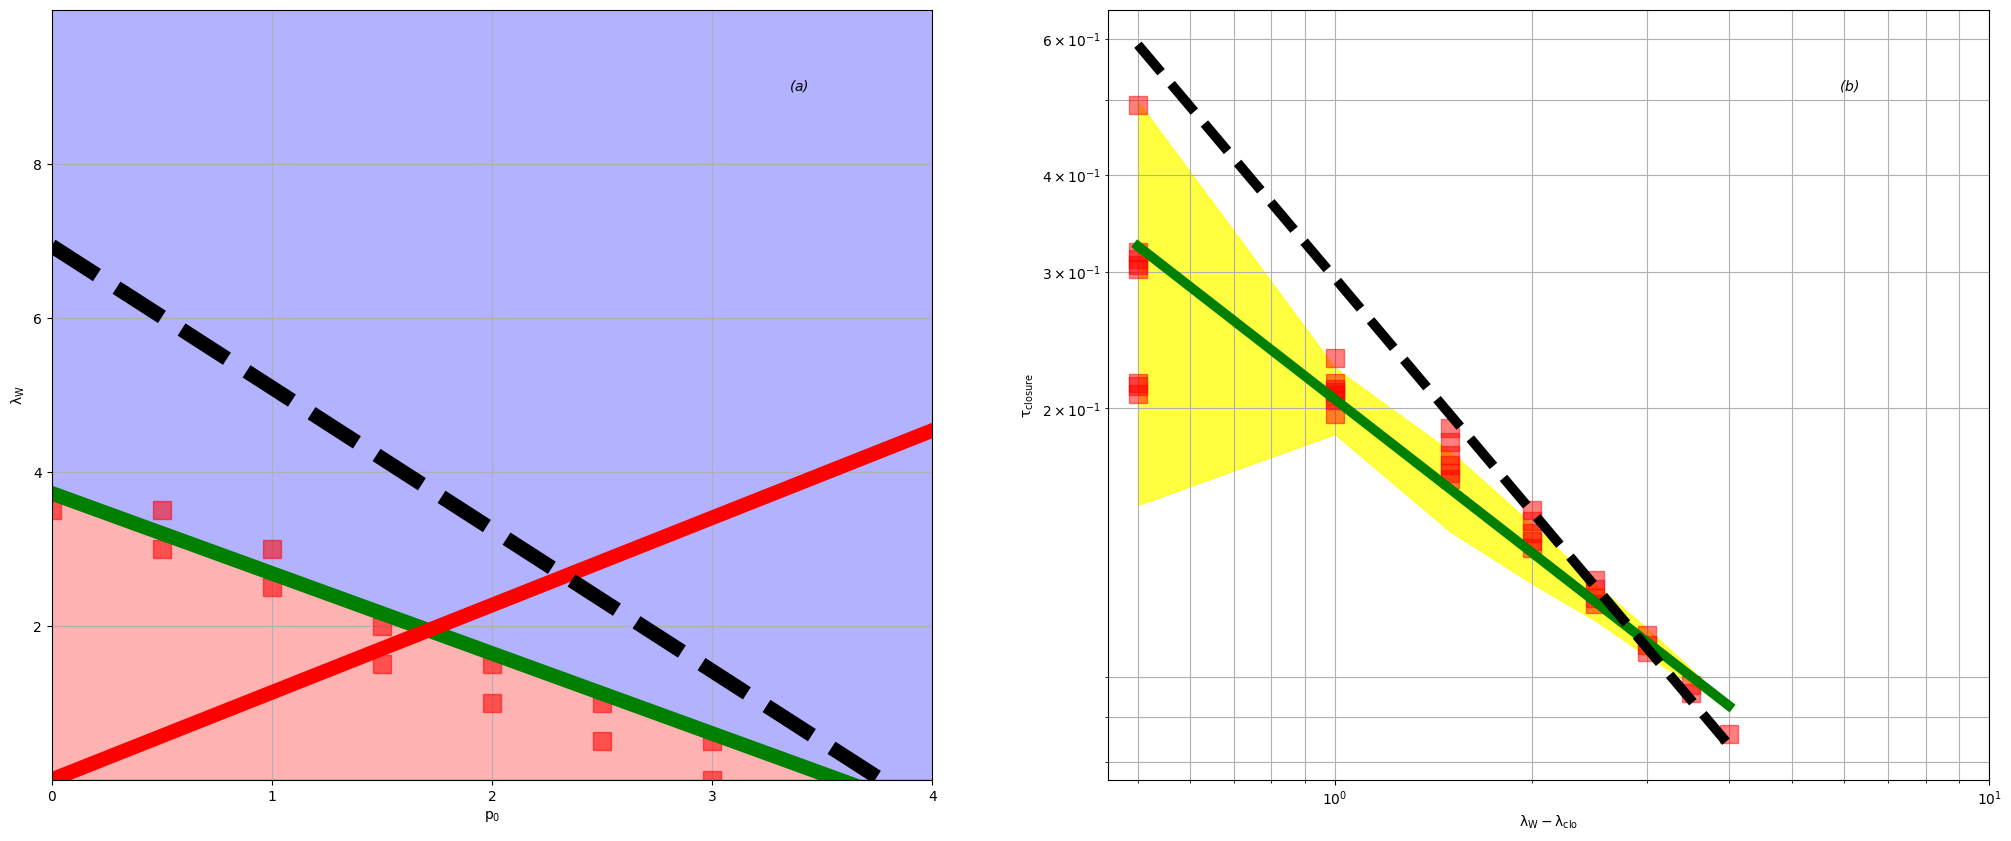

In [46]:

fig,ax = plt.subplots(1,2,figsize=(25,10))



y = np.array(long_lw)-0*np.array(long_p0)/0.882
x = np.array(long_p0)/0.882
reg42 = LinearRegression().fit(x.reshape(-1, 1),y)
x_test = np.arange(0,100)/100*5
y_fit = reg42.coef_.round(2)[0]*x_test+reg42.intercept_
y_theo = 1.84*(3.768-x_test)


# y = np.array(long_lw)-np.array(long_p0)
# x = np.array(long_p0)
# reg42 = LinearRegression().fit(x.reshape(-1, 1),y)
# x_test = np.arange(0,100)/100*5
# y_fit = reg42.coef_.round(2)[0]*x_test+reg42.intercept_
# y_theo = 1.83*(3.768-x_test)


y1 = np.array(long2_lw)
x1 = np.array(long2_p0)
reg421 = LinearRegression().fit(x1.reshape(-1, 1),y1)
y_fit1 = reg421.coef_.round(2)[0]*x_test+reg421.intercept_
y_theo1 = 1.85*(3.768-x_test)+0.01

ax[0].plot(np.array(long_p0),np.array(long_lw)-0*np.array(long_p0)/0.882,'rs',alpha=0.55,ms=13)
# ax[0].plot(np.array(long2_p0),np.array(long2_lw)-0*np.array(long2_p0)/0.544,'bo',alpha=0.9,ms=13)
ax[0].plot(x_test,y_fit,'g-',lw=10.5,label='Fit')
ax[0].plot(x_test,x_test/0.882,'r-',lw=10.5,label='$\lambda_W = \gamma p_0$')
# ax[0].plot(x_test,y_fit1,'k-',lw=10.5,label='Fit')
ax[0].plot(x_test,y_theo,'k--',lw=10.5,label='Theory')
# ax[0].plot(x_test,y_theo1,'k--',lw=10.5,label='Theory')
print(reg42.coef_.round(2)[0])
print(reg42.intercept_)
# ax[0].plot(x_test,y_fit-2*np.mean(stdprop),'g--',lw=7.5)
# ax[0].plot(x_test,y_fit+2*np.mean(stdprop),'g--',lw=7.5,label = "$\pm \mathregular{2\sigma}$")
ax[0].fill_between(x_test,y_fit-2*np.mean(stdprop)/np.sqrt(10),y_fit+2*np.mean(stdprop)/np.sqrt(10),color = 'yellow',alpha=0.75,label = "$\pm \mathregular{2\sigma}$")
ax[0].fill_between(x_test,0*y_fit,y_fit,color = 'red',alpha=0.3,label = "I")
ax[0].fill_between(x_test,y_fit,0*y_fit+12,color = 'blue',alpha=0.3,label = "II+III")
ax[0].set_xlabel("$\mathregular{p_0}$")
ax[0].set_ylabel("$\mathregular{\lambda_W}$")
ax[0].grid(which="both")
ax[0].set_ylim([0,10])
ax[0].set_xlim([0,4])
ax[0].set_xticks([0,1,2,3,4])
ax[0].set_yticks([2,4,6,8]) 

meanb1 = beta1_lin
meanl2 = lambda1_lin
logT = np.log(mean_t2[1:])
logX = np.log(meanl2[1:])
reg4 = LinearRegression().fit(logX.reshape(-1, 1),logT)
mean_fit = np.exp(reg4.intercept_)*meanl2[:]**(reg4.coef_[0])
print(reg4.coef_.round(2)[0])
print(np.exp(reg4.intercept_))
ax[1].plot(meanl2,mean_t1.T,'rs',alpha=0.5,ms=13)
ax[1].plot(meanl2[1:],mean_fit[1:],'g-',lw=7)
n = 5
Extrafactor = 1/(4*np.pi*np.pi)*n

ax[1].plot(meanl2[1:18],Extrafactor*(10/16)*3.722/meanl2[1:18],'k--',lw=7)
ax[1].fill_between(meanl2[:],mean_fit-2*std_t2,mean_fit+2*std_t2,color = "yellow",alpha=0.75)
ax[1].set_xlabel("$\mathregular{\lambda_W-\lambda_{clo}}$")
# plt.legend(prop=font,loc = "best")
ax[1].set_yscale('log')
ax[1].set_xscale('log')
# ax[1].yaxis.tick_right()

plt.figtext(0.84,0.8,"$\mathregular{(b)}$",fontstyle = "italic",color = "black")
plt.figtext(0.42,0.8,"$\mathregular{(a)}$",fontstyle = "italic",color = "black")
# ax = plt.gca()

ax[1].set_ylabel("$\mathregular{\\tau_{closure}}$")
ax[1].grid(which = 'both')
ax[1].set_xticks([1,10])
ax[1].set_yticks([])
# fig.legend(lines, labels, prop=font, loc='lower center', ncols=3, bbox_to_anchor = (0.5,-0.5))

lines_labels = [axi.get_legend_handles_labels() for axi in ax]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Finally, the legend (that maybe you'll customize differently)
# fig.legend(lines, labels, prop=font, loc='lower center', ncols=3, bbox_to_anchor = (0.5,-0.35))
# plt.savefig("EnergyPhases2.pdf", dpi = 200,bbox_inches='tight')
# plt.savefig("ClosurePythonT1.pdf", dpi = 200,bbox_inches='tight')


In [597]:
with open("ClosureEquationsFit.txt",'w') as text:
    y = meanl
    x = -meanb+meanb[len(meanb)//2+1]
    reg4 = LinearRegression().fit(x.reshape(-1, 1),y)
    text.write(str(reg4.coef_.round(2)[0])+"("+str((meanb[len(meanb)//2+1]).round(2))+"-$\mathregular{p_0}$) "+str((reg4.intercept_).round(2))+'\n')
    logT = np.log(mean_t2[1:])
    logX = np.log(meanl2[1:])#np.log(np.arange(1,len(mean_t2[1:])+1))*(1)
    reg4 = LinearRegression().fit(logX.reshape(-1, 1),logT)
    text.write("$\mathregular{T_0[p_0-\lambda_{clo}]^{-\\beta}, \\beta =} $" + str(reg4.coef_.round(2)[0])+", $\mathregular{T_0} = $" + str(np.exp(reg4.intercept_).round(2)*4.93))

In [577]:
a = np.array([[0],[1]])
b = np.array([[1],[0]])

R = 2/np.sqrt(5)*np.array([[-1/2,1],[1,1/2]])

np.arccos((R.dot(a).T).dot(a))

array([[1.10714872]])